<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/UTS/Mlp%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buat pipeline end‑to‑end untuk regresi/klasifikasi model deep learning:
a. Pengumpulan & pembersihan data (Pandas). Coba pakai semua feature (fokus di feature engineering)
b. Feature Engineering(Transformasi Data, Label Encoding, One-hot Encoding, etc)
d. Model‑model yang akan dijalankan dengan modul TensorFlow/PyTorch untuk MLP
2. Gunakan Matriks Evaluasi Regresi (RMSE,MSE,RSquared) serta visualisasikan predicted dan actual value! Jelaskan matriks mana terbaik! Gunakan Matriks Evaluasi Klasifikasi (Accuracy, Precision, Recall, F1-Score, AUC-ROC) serta visualisasikan confusion matrix! Jelaskan matriks mana terbaik!

In [6]:
from google.colab import files
uploaded = files.upload()


Saving RegresiUTSTelkom.csv to RegresiUTSTelkom.csv


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [8]:
# Memuat dataset
data = pd.read_csv('/content/RegresiUTSTelkom.csv')  # Sesuaikan dengan path file yang diunggah

In [9]:
# Menampilkan beberapa baris pertama dari dataset
print(data.head())

   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

In [10]:
# 2. Feature Engineering
# Scaling untuk fitur numerik
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [11]:
# Periksa jika ada kolom numerik yang ditemukan
print(f"Fitur numerik: {numeric_features}")

Fitur numerik: Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1

In [12]:
# One-hot Encoding untuk fitur kategorikal
data = pd.get_dummies(data, drop_first=True)

In [13]:

# 3. Log Transformation untuk fitur numerik yang sangat besar
# Cek distribusi dari setiap fitur numerik dan lakukan log transformasi jika perlu
for col in numeric_features:
    # Menampilkan statistik untuk memastikan apakah ada nilai besar yang perlu di-log transform
    print(f"Distribusi fitur {col}: Max value = {data[col].max()}, Min value = {data[col].min()}")

    if data[col].max() > 100:  # Ambil threshold untuk memilih kolom yang besar
        data[col] = np.log1p(data[col])  # Menggunakan log(1 + x) untuk menghindari masalah log(0)

# Menampilkan beberapa baris pertama untuk memeriksa perubahan
print(data.head())


Distribusi fitur 2001: Max value = 1.1529476473639995, Min value = -6.988999794012992
Distribusi fitur 49.94357: Max value = 3.062689669749128, Min value = -6.862424382917939
Distribusi fitur 21.47114: Max value = 7.420970692477297, Min value = -6.560290107565527
Distribusi fitur 73.0775: Max value = 8.908614446786613, Min value = -8.780173214917749
Distribusi fitur 8.74861: Max value = 20.499423382196568, Min value = -9.517228581526277
Distribusi fitur -17.40628: Max value = 11.750362183884356, Min value = -7.672519800051871
Distribusi fitur -13.09905: Max value = 13.669487394276773, Min value = -5.620914933025684
Distribusi fitur -25.01202: Max value = 11.995309881854515, Min value = -12.752196426207169
Distribusi fitur -12.23257: Max value = 16.13981465798316, Min value = -8.878991011057616
Distribusi fitur 7.83089: Max value = 13.471792674207647, Min value = -12.303566363662283
Distribusi fitur -2.46783: Max value = 8.952665744935324, Min value = -6.663480555453203
Distribusi fitur

In [14]:

# 4. Feature Interaction: Menggabungkan fitur untuk menangkap hubungan antar fitur
# Misalnya mengalikan dua fitur numerik untuk membuat interaksi fitur baru
data['interaction'] = data[numeric_features[0]] * data[numeric_features[1]]  # Menambahkan interaksi antara dua fitur pertama


In [15]:
print(data.columns)


Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1245', '-8.40816

In [16]:
print(data.dtypes)


2001           float64
49.94357       float64
21.47114       float64
73.0775        float64
8.74861        float64
                ...   
68.40795       float64
-1.82223       float64
-27.46348      float64
2.26327        float64
interaction    float64
Length: 92, dtype: object


In [17]:

# 5. Membagi Data untuk Pelatihan dan Pengujian
# Gantilah '2001' dengan nama kolom target yang sesuai setelah pemeriksaan
X = data.drop('2001', axis=1)  # Ganti '2001' dengan nama kolom target yang sesuai
y = data['2001']  # Ganti '2001' dengan nama kolom target yang sesuai


In [18]:

# Pembagian data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# 6. Membuat Model MLP (Multilayer Perceptron)
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer untuk regresi
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:

# 7. Melatih Model dengan 5-10 Epochs
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.2996 - val_loss: 0.0486
Epoch 2/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0439 - val_loss: 0.0275
Epoch 3/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0318 - val_loss: 0.0267
Epoch 4/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0273 - val_loss: 0.0241
Epoch 5/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0246 - val_loss: 0.0228
Epoch 6/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.0229 - val_loss: 0.0199
Epoch 7/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0208 - val_loss: 0.0199
Epoch 8/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0201 - val_loss: 0.0212
Epoch 9/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.0193 - val_loss: 0.0174
Epoch 10/10
12884/12884 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0177 - val_loss: 0.0219


In [22]:
# 8. Evaluasi Model Regresi
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Prediksi dengan model
y_pred = model.predict(X_test)

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [24]:
# Metrik Evaluasi: RMSE, MSE, R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, MSE: {mse}, R-Squared: {r2}")

RMSE: 0.1481271473709038, MSE: 0.021941651788241447, R-Squared: 0.9779103918567804


In [25]:
# 9. Mengubah Prediksi Regresi menjadi Klasifikasi (misalnya, nilai prediksi > 0 menjadi kelas 1, sisanya kelas 0)
y_pred_class = (y_pred > 0).astype(int)  # Ganti 0 dengan threshold yang sesuai


In [26]:
# 10. Mengubah y_test menjadi kelas biner sesuai threshold yang sama
y_test_class = (y_test > 0).astype(int)  # Ganti 0 dengan threshold yang sesuai


In [27]:
# 11. Menghitung Metrik Klasifikasi
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

In [28]:
# AUC-ROC hanya berlaku jika model memberikan probabilitas, bukan biner. Jika ingin menggunakan AUC, perlu ubah model ke klasifikasi probabilistik.
try:
    roc_auc = roc_auc_score(y_test_class, y_pred_class)
except:
    roc_auc = 'N/A'  # Jika gagal (karena model regresi menghasilkan nilai kontinu)

In [29]:

# Menampilkan hasil evaluasi klasifikasi
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.9742114505816492
Precision: 0.9680660743037748
Recall: 0.9921161191749427
F1-Score: 0.9799435582451745
AUC-ROC: 0.9675884032967671


In [30]:
# 12. Visualisasi Hasil Evaluasi Klasifikasi dalam Grafik
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'AUC-ROC': roc_auc}

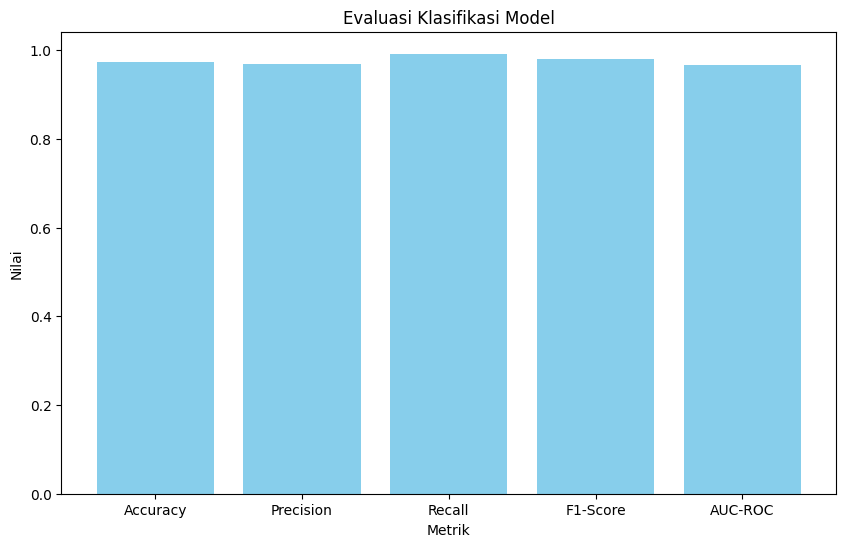

In [31]:
# Membuat grafik bar untuk metrik
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.title('Evaluasi Klasifikasi Model')
plt.show()

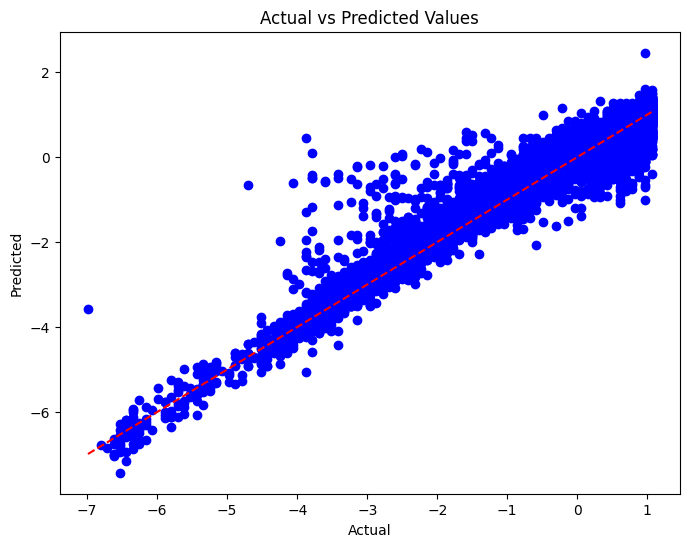

In [32]:

# 13. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

In [34]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

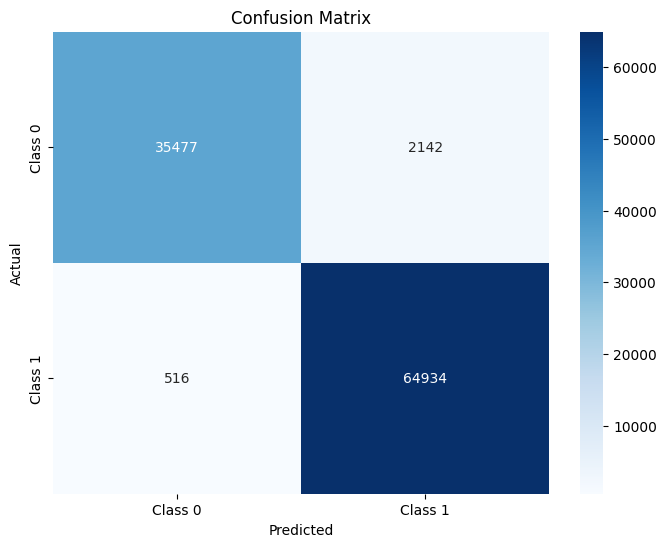

In [35]:
# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()